In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("result_split/gini_accuracy_all_runs.csv")
df["Method"] = df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)

In [6]:
print(df["Method"].unique())

['SPH' 'RF+B' 'SPH+CPI']


In [12]:
print(df["Run"].unique())
print(df[df["Run"].isna()])

[ 1. nan  2.  3.  4.  5.]
      R_e       A@e   Method  gini  p value  Run  SPH Executed  info loss  \
20      1  0.313333  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
21      2  0.430000  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
22      3  0.513333  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
23      4  0.566667  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
24      5  0.636667  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
...   ...       ...      ...   ...      ...  ...           ...        ...   
2485    6  0.553333  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
2486    7  0.603333  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
2487    8  0.636667  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
2488    9  0.683333  SPH+CPI   NaN      NaN  NaN           NaN        NaN   
2489   10  0.706667  SPH+CPI   NaN      NaN  NaN           NaN        NaN   

      SPH A@1  RF+B A@1  CPI A@1  Avg Acc SPH+CPI

In [13]:
df = df[~df['Run'].isnull()]
df

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI
0,1,0.386667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
1,2,0.546667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
2,3,0.640000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
3,4,0.740000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
4,5,0.783333,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6,0.776667,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2496,7,0.800000,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2497,8,0.823333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2498,9,0.833333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333


In [7]:
df_tap = df

In [8]:
df_tap['Acc average'] = df_tap.groupby(['Run', 'gini', 'p value', 'Method'])['A@e'].transform('mean')

<ipython-input-8-7ae15400f1ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tap['Acc average'] = df_tap.groupby(['Run', 'gini', 'p value', 'Method'])['A@e'].transform('mean')


In [15]:
df_tap

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI
0,1,0.386667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
1,2,0.546667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
2,3,0.640000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
3,4,0.740000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
4,5,0.783333,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6,0.776667,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2496,7,0.800000,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2497,8,0.823333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2498,9,0.833333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333


In [8]:
df = pd.read_csv("result_split/gini_accuracy_all_runs.csv")
df = df[~df['Run'].isnull()]

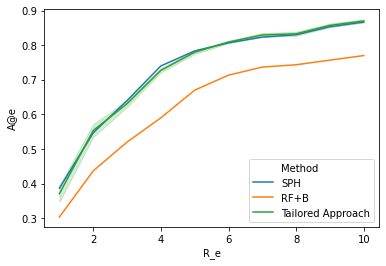

In [9]:
best_run_df = df[df["Run"] == 1]
#best_run_df["Method"] = df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)
sns.lineplot(x="R_e", y="A@e", data=best_run_df, hue="Method", ci="sd")

In [10]:
filtered_df_tap = df_tap[df_tap["Method"] == "SPH+CPI"]

best_run_df['Acc average'] = best_run_df.groupby(['Run','gini', 'p value', 'Method'])['A@e'].transform('mean')
idx = best_run_df.groupby(['gini', 'p value'])['Acc average'].transform(max) == best_run_df['Acc average']
print(idx)
print(best_run_df[idx])
#df_max_acc = df_tap[ (df_tap["Acc average"] == df_tap["Acc average"].max()) & ]
#sns.lineplot(x="R_e", y="A@e", data=df_max_acc, hue='Method')

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: Acc average, Length: 260, dtype: bool
     R_e       A@e             Method  gini  p value  Run  SPH Executed  \
0      1  0.386667                SPH  -1.0    -1.00  1.0           8.0   
1      2  0.546667                SPH  -1.0    -1.00  1.0           8.0   
2      3  0.640000                SPH  -1.0    -1.00  1.0           8.0   
3      4  0.740000                SPH  -1.0    -1.00  1.0           8.0   
4      5  0.783333                SPH  -1.0    -1.00  1.0           8.0   
..   ...       ...                ...   ...      ...  ...           ...   
495    6  0.810000  Tailored Approach   0.4     0.95  1.0           8.0   
496    7  0.830000  Tailored Approach   0.4     0.95  1.0           8.0   
497    8  0.833333  Tailored Approach   0.4     0.95  1.0           8.0   
498    9  0.856667  Tailored Approach   0.4     0.95  1.0           8.0   

<ipython-input-10-e312a70101a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_run_df['Acc average'] = best_run_df.groupby(['Run','gini', 'p value', 'Method'])['A@e'].transform('mean')


In [11]:
#max_run = 10
#df_max_acc = df_max_acc.reset_index()
df_max_acc = best_run_df[best_run_df['Run'] == 1]
df_max_acc

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI,Acc average
0,1,0.386667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,0.727667
1,2,0.546667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,0.727667
2,3,0.640000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,0.727667
3,4,0.740000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,0.727667
4,5,0.783333,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,0.727667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6,0.810000,Tailored Approach,0.4,0.95,1.0,8.0,0.25,0.386667,0.303333,0.193333,0.733,0.733000
496,7,0.830000,Tailored Approach,0.4,0.95,1.0,8.0,0.25,0.386667,0.303333,0.193333,0.733,0.733000
497,8,0.833333,Tailored Approach,0.4,0.95,1.0,8.0,0.25,0.386667,0.303333,0.193333,0.733,0.733000
498,9,0.856667,Tailored Approach,0.4,0.95,1.0,8.0,0.25,0.386667,0.303333,0.193333,0.733,0.733000


In [12]:
df = pd.read_csv("acc_per_group.csv", sep=';', decimal=',')
df

,target,equal,train count,Method
0,0,0.0,2,SPH+CPI
1,1,0.0,1,SPH+CPI
2,2,1.0,2,SPH+CPI
3,3,0.0,1,SPH+CPI
4,4,0.0,2,SPH+CPI
...,...,...,...,...
211,79,0.0,3,SPH
212,80,0.0,3,SPH
213,81,0.0,3,SPH
214,82,0.0,3,SPH


In [13]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'], axis='columns')

In [13]:
#df = df.drop([";group;target;equal;count;Method;\";group;target;equal;count;Method\""], axis='columns')
df

,target,equal,train count,Method
0,0,0.0,2,SPH+CPI
1,1,0.0,1,SPH+CPI
2,2,1.0,2,SPH+CPI
3,3,0.0,1,SPH+CPI
4,4,0.0,2,SPH+CPI
...,...,...,...,...
211,79,0.0,3,SPH
212,80,0.0,3,SPH
213,81,0.0,3,SPH
214,82,0.0,3,SPH


In [15]:
df = df.dropna()

In [14]:
df['target'].unique()
minority_df = df[df['train count'] < 16]
majority_df = df[df['train count']>=16]
print(minority_df["train count"].unique())

[ 2  1 10  7  5  4  3  6 15 12  9 13  8 11]


<ipython-input-15-98f846ef4e61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  majority_df['accuracy'] = majority_df['equal']


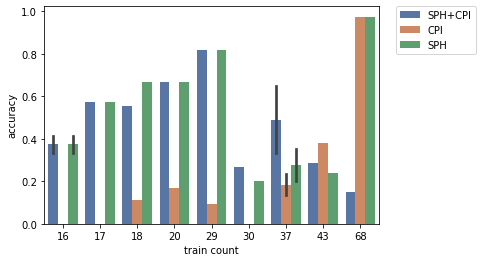

In [15]:
majority_df['accuracy'] = majority_df['equal'] 
df['accuracy'] = df['equal'] 
sns.barplot( palette="deep", data=majority_df, hue="Method", x="train count", y="accuracy", 
           #showmeans=True
           )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<ipython-input-88-d2556e024449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minority_df['accuracy'] = minority_df['equal']


[ 2  1 10  7  5  4  3  6 15 12  9 13  8 11]


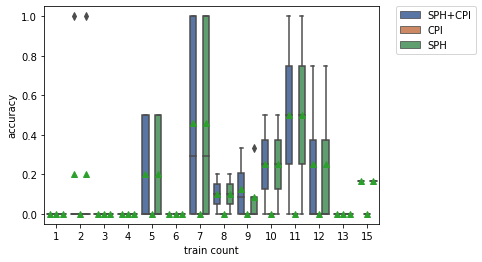

In [88]:
minority_df['accuracy'] = minority_df['equal'] 
print(minority_df["train count"].unique())
sns.boxplot(palette="deep", data=minority_df, hue="Method", x="train count", y="accuracy", 
            showmeans=True
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

216


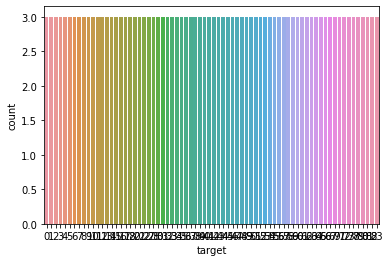

In [83]:
print(len(df))
sns.countplot(x="target", data=df)

In [56]:
print(sum(minority_df[minority_df["Method"] == "SPH+CPI"]['count']))
sns.countplot(x="class count", data=minority_df[minority_df["Method"] == "SPH+CPI"])

264


ValueError: Could not interpret input 'class count'